<a href="https://colab.research.google.com/github/madduvatsalya/DataScience_Projects/blob/main/Titanic_Classification_Bharat_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Titanic** **Classification**



In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

from sklearn.preprocessing import StandardScaler

### 1.Check columns

In [82]:
train= pd.read_csv('/content/drive/MyDrive/train (1).csv')
test= pd.read_csv('/content/drive/MyDrive/test.csv')

In [83]:
print('TRAIN Information:')
print(train.info(),'\n')
print('TEST Information:')
print(test.info())

TRAIN Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

TEST Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passen

To calculate the number of duplicate values in the PassengerId column, we first combine the train and test data to create the all_data dataset. This allows us to have a unified dataset containing all the records.

The expression len(all_data.drop('Survived', axis=1))-len(all_data.drop('Survived', axis=1).drop_duplicates()) calculates the number of duplicate rows by subtracting the number of rows in the original DataFrame from the number of rows in the DataFrame after removing duplicates.


In [84]:
all_data = pd.concat([train, test], axis=0).reset_index(drop=True)

print(F"Number of duplicate rows: {len(all_data.drop('Survived', axis=1))-len(all_data.drop('Survived', axis=1).drop_duplicates())}")
print(f"Shape of train:    {train.shape}")
print(f"Shape of test:     {test.shape}")
print(f"Shape of all_data: {all_data.shape}")

Number of duplicate rows: 0
Shape of train:    (891, 12)
Shape of test:     (418, 11)
Shape of all_data: (1309, 12)


In [85]:
#The code checks for duplicate values in the 'PassengerId' column.
print(F"Number of duplicates in PassengerId column = {len(all_data)-len(pd.unique(all_data['PassengerId']))}")

Number of duplicates in PassengerId column = 0


## The code displays the count and ratio of passengers who did not survive (0) and passengers who survived (1).

In [86]:
print("Value count")
print(train['Survived'].value_counts())
#\nRatio" is a string consisting of a Newline and the string "Ratio
print("\nRatio")
print(train['Survived'].value_counts(normalize= True))

Value count
0    549
1    342
Name: Survived, dtype: int64

Ratio
0    0.616162
1    0.383838
Name: Survived, dtype: float64


# A bar graph visualizing the count of survivors and non-survivors based on the values in the Survived column is displayed.

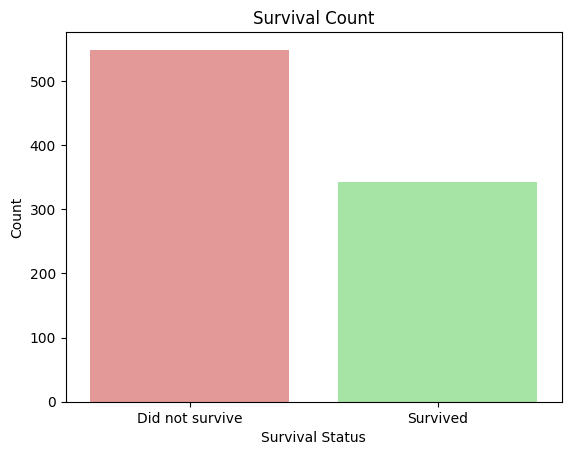

In [87]:
sns.countplot(data=train, x='Survived', palette=['lightcoral', 'lightgreen'], alpha=0.9)

# Set the x-axis label and ticks
plt.xlabel("Survived")
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'])

# Set the title and axis labels of the graph
plt.title("Survival Count")
plt.xlabel("Survival Status")
plt.ylabel("Count")

# Display the graph
plt.show()

In [88]:
pclass_pivot = train.pivot_table(index='Pclass', columns='Survived', values='PassengerId', aggfunc='count')
pclass_pivot.columns = ['No', 'Yes']
pclass_pivot['Total'] = pclass_pivot['Yes'] + pclass_pivot['No']
pclass_pivot['Survival %'] = round(pclass_pivot['Yes'] / (pclass_pivot['Yes'] + pclass_pivot['No']) * 100,1).astype(str) + '%'
pclass_pivot

,No,Yes,Total,Survival %
Pclass,,,,
1,80,136,216,63.0%
2,97,87,184,47.3%
3,372,119,491,24.2%


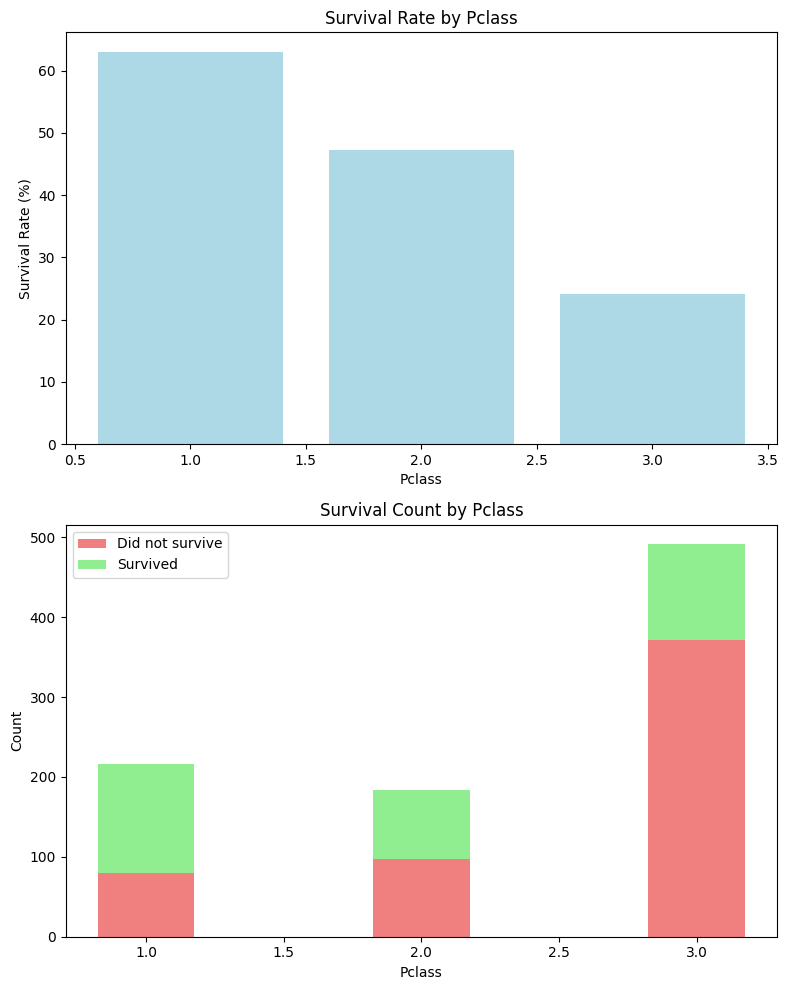

In [89]:
# Extracting the data
survival_percentage = pclass_pivot['Survival %']
no_survived = pclass_pivot['No']
yes_survived = pclass_pivot['Yes']

# Creating the graphs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Visualizing the survival rate
x = pclass_pivot.index
y = [float(percentage.strip('%')) for percentage in survival_percentage]
ax1.bar(x, y, color='lightblue')
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Survival Rate (%)')
ax1.set_title('Survival Rate by Pclass')

# Visualizing the count of survivors and non-survivors
width = 0.35
ax2.bar(x, no_survived, width, label='Did not survive', color='lightcoral')
ax2.bar(x, yes_survived, width, bottom=no_survived, label='Survived', color='lightgreen')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Count')
ax2.set_title('Survival Count by Pclass')
ax2.legend()


# Displaying the graphs
plt.tight_layout()
plt.show()


In [90]:
print(F"Number of duplicates in Name column = {len(all_data)-len(pd.unique(all_data['Name']))}")

Number of duplicates in Name column = 2


In [91]:
#Extract rows with duplicate values in the Name column and display them sorted by Name column
all_data[all_data.duplicated(subset='Name', keep=False)].sort_values('Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [92]:
sex_pivot = train.pivot_table(index='Sex', columns='Survived', values='PassengerId', aggfunc='count', fill_value= 0)
sex_pivot.columns = ['No', 'Yes']
sex_pivot['Total'] = sex_pivot.sum(axis=1)
sex_pivot['Survival %'] = round(sex_pivot['Yes'] / sex_pivot['Total']  * 100,1).astype(str) + '%'
sex_pivot

,No,Yes,Total,Survival %
Sex,,,,
female,81,233,314,74.2%
male,468,109,577,18.9%


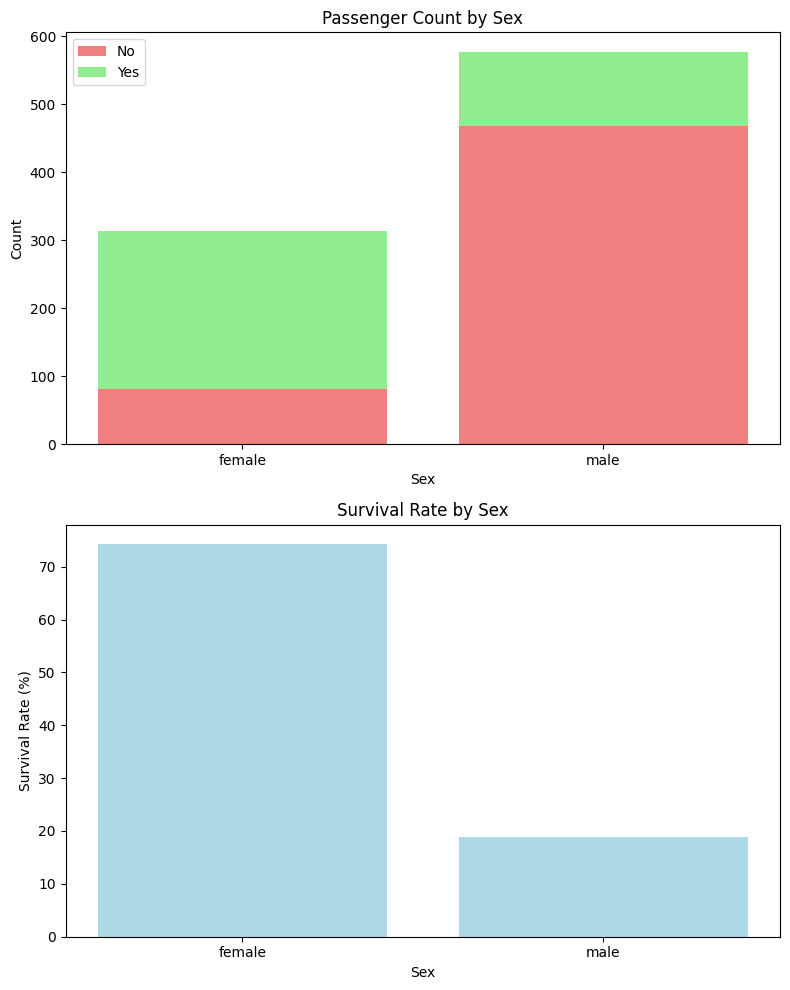

In [93]:
#Here's the code to create a graph visualizing the passenger count by sex and the survival rate by sex

# Extract the data
sex_count = sex_pivot[['No', 'Yes']]
survival_percentage = sex_pivot['Survival %']

# Create the visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Bar plot for passenger count by sex
x = sex_count.index
y_no = sex_count['No']
y_yes = sex_count['Yes']
ax1.bar(x, y_no, label='No', color='lightcoral')
ax1.bar(x, y_yes, bottom=y_no, label='Yes', color='lightgreen')
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')
ax1.set_title('Passenger Count by Sex')
ax1.legend()

# Bar plot for survival rate by sex
x = survival_percentage.index
y = [float(percentage.strip('%')) for percentage in survival_percentage]
ax2.bar(x, y, color='lightblue')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Survival Rate (%)')
ax2.set_title('Survival Rate by Sex')

# Display the graph
plt.tight_layout()
plt.show()


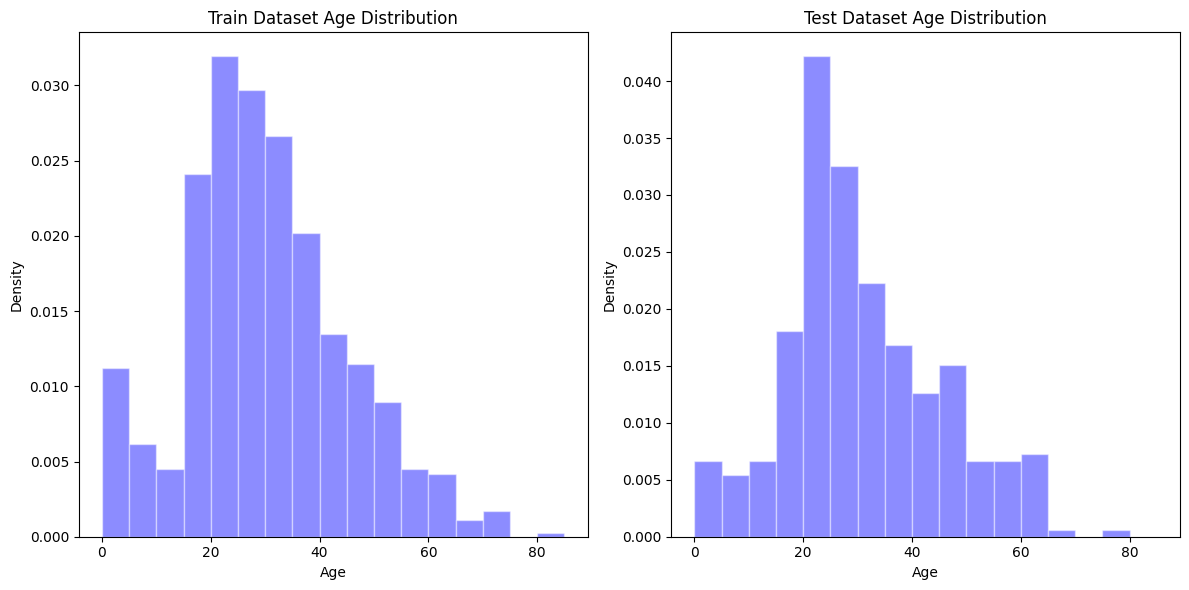

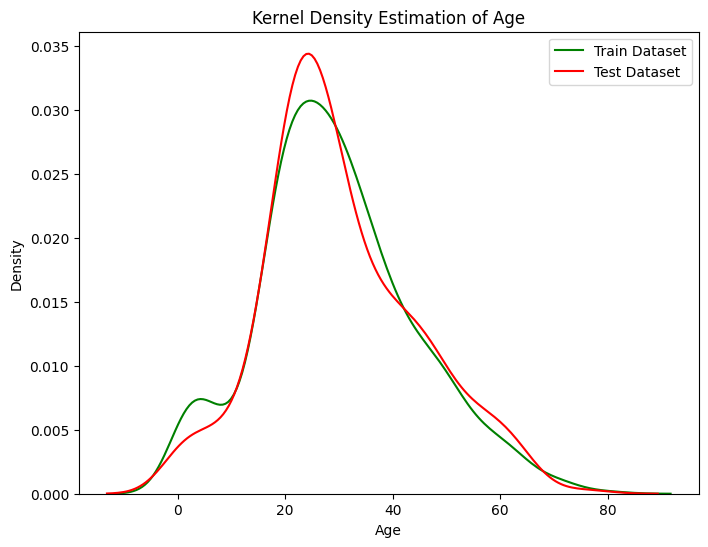

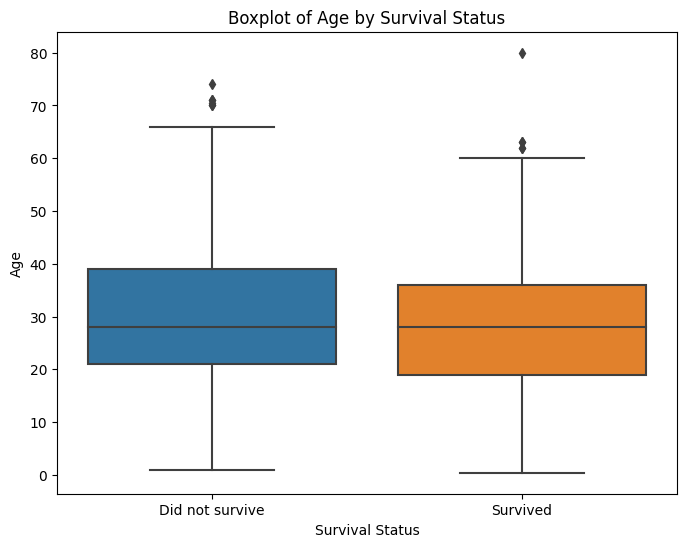

In [94]:
# Comparing data distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of age in train dataset
ax1.hist(train['Age'].dropna(), bins=range(0, 90, 5), alpha=0.45, density=True, color='blue', edgecolor='white')
ax1.set_title('Train Dataset Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')

# Histogram of age in test dataset
ax2.hist(test['Age'].dropna(), bins=range(0, 90, 5), alpha=0.45, density=True, color='blue', edgecolor='white')
ax2.set_title('Test Dataset Age Distribution')
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

# Kernel density estimation plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=train, x='Age', color='green', label='Train Dataset')
sns.kdeplot(data=test, x='Age', color='red', label='Test Dataset')
ax.set_title('Kernel Density Estimation of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
plt.legend()
plt.show()

# Boxplot of age by survival status
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=train.dropna(subset=['Age']), x='Survived', y='Age')
ax.set_xticklabels(['Did not survive', 'Survived'])
ax.set_title('Boxplot of Age by Survival Status')
ax.set_xlabel('Survival Status')
ax.set_ylabel('Age')
plt.show()


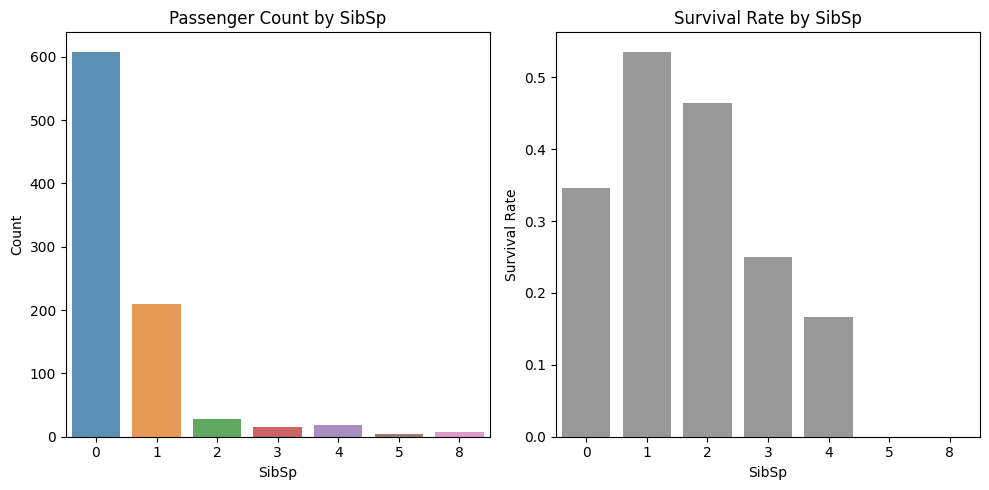

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Passenger count by SibSp
sns.countplot(x="SibSp", data=train, alpha=0.8, ax=ax1)
ax1.set_title("Passenger Count by SibSp")
ax1.set_xlabel("SibSp")
ax1.set_ylabel("Count")

# Plot 2: Survival rate by SibSp
sibsp_survival_rate = train.groupby("SibSp")["Survived"].mean().reset_index()
sns.barplot(x="SibSp", y="Survived", data=sibsp_survival_rate, alpha=0.8, color="grey", ax=ax2)
ax2.set_title("Survival Rate by SibSp")
ax2.set_xlabel("SibSp")
ax2.set_ylabel("Survival Rate")

plt.tight_layout()
plt.show()


In [96]:
SibSp_pivot= train.pivot_table(index= 'SibSp', columns='Survived', values='PassengerId', aggfunc='count', fill_value= 0)
SibSp_pivot.columns= ['No','Yes']
SibSp_pivot['Total'] = SibSp_pivot.sum(axis=1)
SibSp_pivot['Survival %']= round(SibSp_pivot['Yes']/SibSp_pivot['Total']*100,1).astype(str) + '%'
SibSp_pivot


,No,Yes,Total,Survival %
SibSp,,,,
0,398,210,608,34.5%
1,97,112,209,53.6%
2,15,13,28,46.4%
3,12,4,16,25.0%
4,15,3,18,16.7%
5,5,0,5,0.0%
8,7,0,7,0.0%


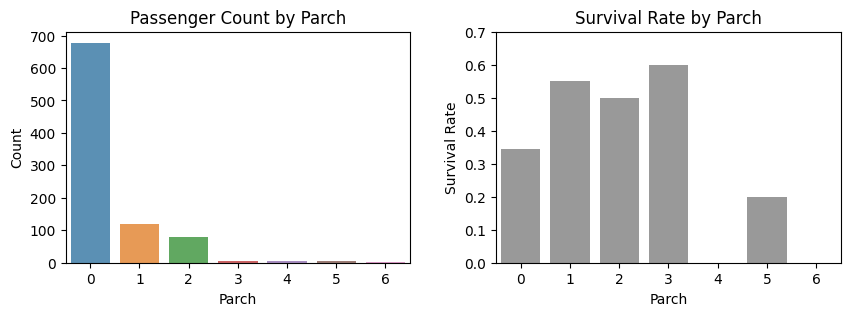

In [97]:
fig = plt.figure(figsize=(10, 3))

ax1 = plt.subplot(1, 2, 1)
sns.countplot(x="Parch", data=train, alpha=0.8, ax=ax1)
ax1.set_title("Passenger Count by Parch")
ax1.set_xlabel("Parch")
ax1.set_ylabel("Count")

ax2 = plt.subplot(1, 2, 2)
Parch_survival_rate = train.groupby('Parch')['Survived'].mean().reset_index().sort_values(by='Survived', ascending=False)
sns.barplot(x='Parch', y='Survived', data=Parch_survival_rate, alpha=0.8, color='grey', ax=ax2)
ax2.set_title("Survival Rate by Parch")
ax2.set_xlabel("Parch")
ax2.set_ylabel("Survival Rate")
ax2.set_ylim([0, 0.7])

plt.subplots_adjust(wspace=0.25)
plt.show()


In [98]:
parch_pivot = train.pivot_table(index='Parch', columns='Survived', values='PassengerId', aggfunc='count', fill_value=0)
parch_pivot.columns = ['No', 'Yes']
parch_pivot['Total'] = parch_pivot.sum(axis=1)
parch_pivot['Survival %'] = round(parch_pivot['Yes'] / parch_pivot['Total'] * 100, 1).astype(str) + '%'
parch_pivot

,No,Yes,Total,Survival %
Parch,,,,
0,445,233,678,34.4%
1,53,65,118,55.1%
2,40,40,80,50.0%
3,2,3,5,60.0%
4,4,0,4,0.0%
5,4,1,5,20.0%
6,1,0,1,0.0%


In [99]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [100]:
print(F"Number of unique Fare values= {len(pd.unique(train['Fare']))}")

Number of unique Fare values= 248


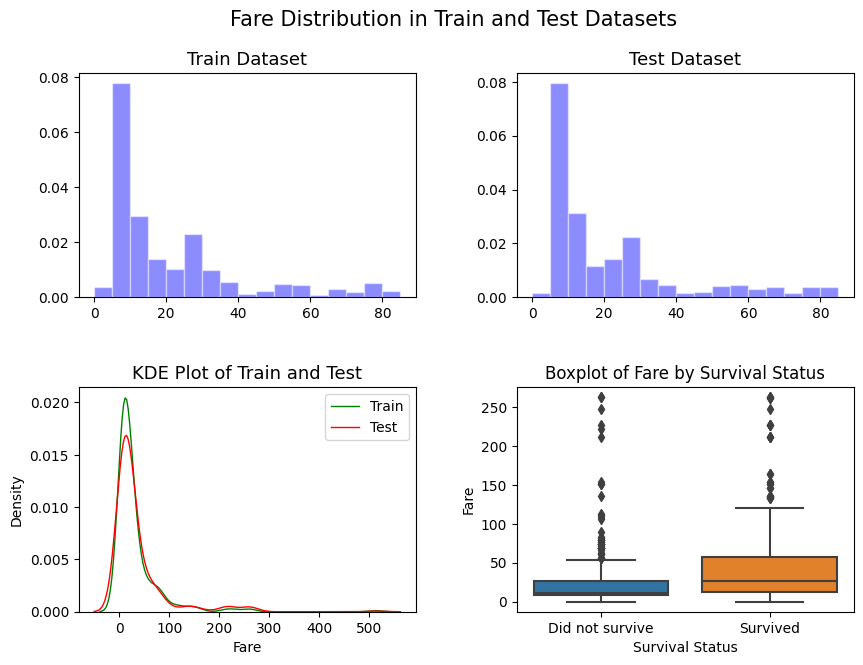

In [101]:
fig = plt.figure(figsize=(10, 7))

ax1 = plt.subplot(2, 2, 1)
count, bin_edges = np.histogram(train['Fare'], bins=range(0, 90, 5))
ax1.hist(train['Fare'].dropna(), bins=bin_edges, alpha=0.45, density=True, color='blue', edgecolor='white')
ax1.set_title('Train Dataset', fontsize=13)

ax2 = plt.subplot(2, 2, 2)
count, bin_edges = np.histogram(test['Fare'], bins=range(0, 90, 5))
ax2.hist(test['Fare'].dropna(), bins=bin_edges, alpha=0.45, density=True, color='blue', edgecolor='white')
ax2.set_title('Test Dataset', fontsize=13)

ax3 = plt.subplot(2, 2, 3)
sns.kdeplot(data=train, x='Fare', color='green', label='Train', linewidth=1, ax=ax3)
sns.kdeplot(data=test, x='Fare', color='red', label='Test', linewidth=1, ax=ax3)
ax3.legend()
ax3.set_title('KDE Plot of Train and Test', fontsize=13)

ax4 = plt.subplot(2, 2, 4)
sns.boxplot(data=train[train['Fare'] < 500], y='Fare', x='Survived', ax=ax4)
ax4.set_xticklabels(['Did not survive', 'Survived'])
ax4.set_title('Boxplot of Fare by Survival Status')
ax4.set_xlabel('Survival Status')

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Fare Distribution in Train and Test Datasets', y=0.97, fontsize=15)
plt.show()


In [102]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

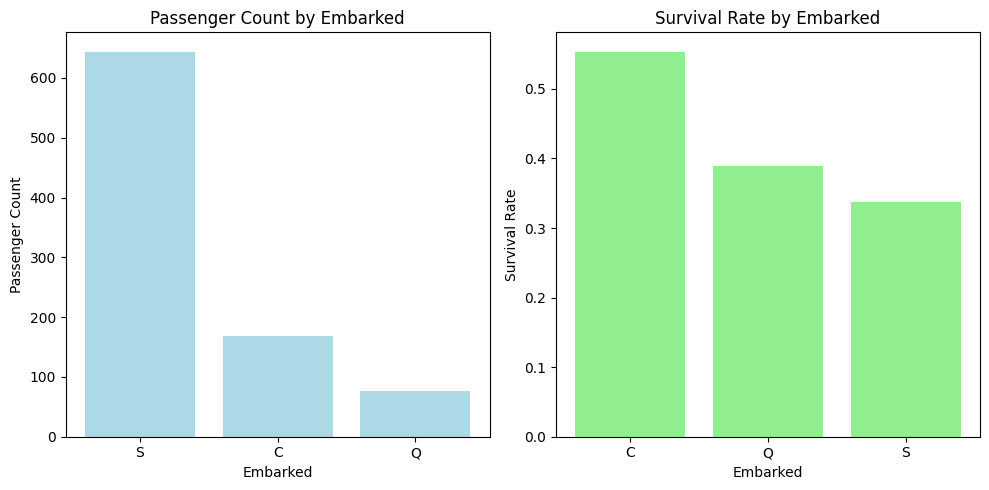

In [103]:
# Calculate passenger count by embarked port
embarked_count = train['Embarked'].value_counts()

# Calculate survival rate by embarked port
embarked_survival_rate = train.groupby('Embarked')['Survived'].mean()

# Create the graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Passenger count by embarked port
ax1.bar(embarked_count.index, embarked_count.values, color='lightblue')
ax1.set_xlabel('Embarked')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Passenger Count by Embarked')

# Survival rate by embarked port
ax2.bar(embarked_survival_rate.index, embarked_survival_rate.values, color='lightgreen')
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Survival Rate')
ax2.set_title('Survival Rate by Embarked')

# Display the graph
plt.tight_layout()
plt.show()

In [104]:
embarked_pivot = train.pivot_table(index='Embarked', columns='Survived', values='PassengerId', aggfunc='count', fill_value= 0)
embarked_pivot.columns = ['No', 'Yes']
embarked_pivot['Total'] = embarked_pivot.sum(axis=1)
embarked_pivot['Survival %'] = round(embarked_pivot['Yes'] / embarked_pivot['Total']  * 100,1).astype(str) + '%'
embarked_pivot

,No,Yes,Total,Survival %
Embarked,,,,
C,75,93,168,55.4%
Q,47,30,77,39.0%
S,427,217,644,33.7%


<ipython-input-105-55e622d0f9ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= train.corr()


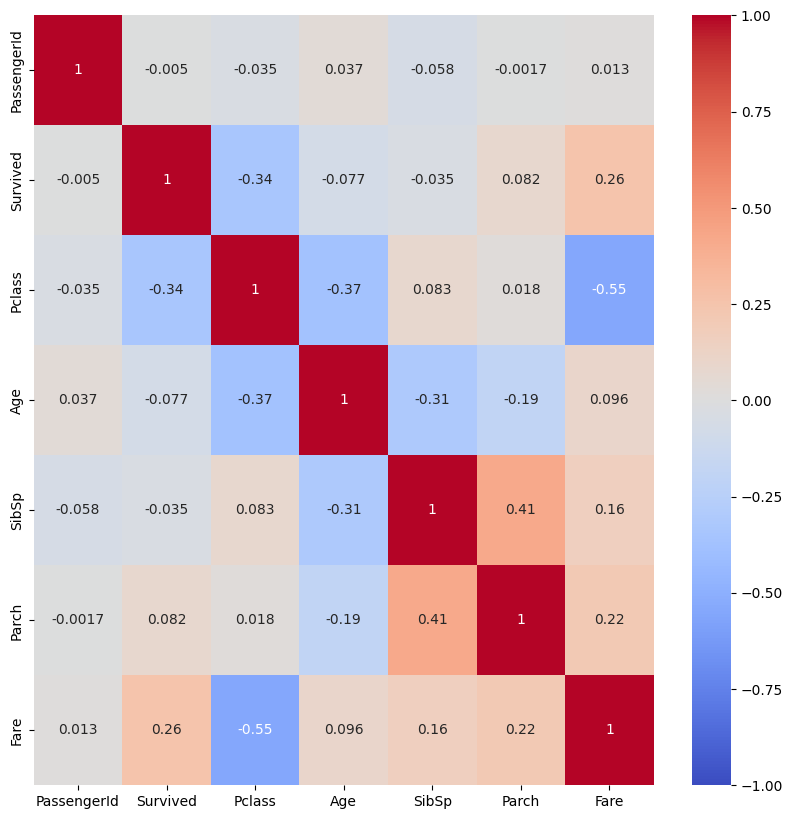

In [105]:
corr= train.corr()
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [106]:
#Check for missing values in traindata
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

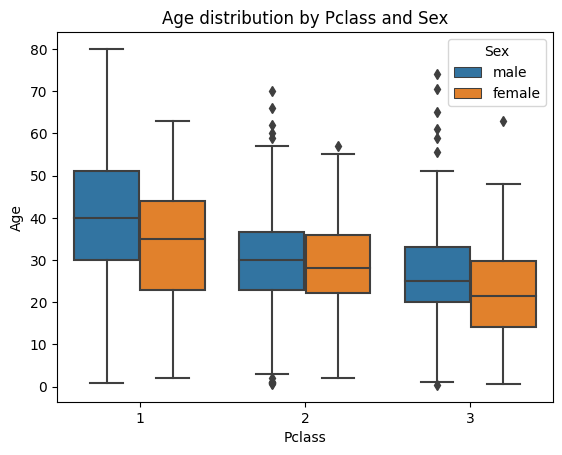

In [107]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train)
plt.title('Age distribution by Pclass and Sex')
plt.show()

In [108]:
age_median = train.groupby(['Pclass','Sex'])['Age'].median()
age_median

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [109]:
train['Age'] = train.apply(lambda x: age_median.loc[(x['Pclass'], x['Sex'])] if np.isnan(x['Age']) else x['Age'], axis=1)

In [110]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [111]:
all_data[all_data['Ticket']=='113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [112]:
most_frequent_value= train['Embarked'].value_counts().idxmax()
train['Embarked'].replace(np.nan, most_frequent_value, inplace=True)
print(F"Most frequent value= {most_frequent_value}")

Most frequent value= S


In [113]:
list(train["Cabin"].unique())


[nan,
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

In [114]:
train['Cabin_Letter'] = train['Cabin'].str[:1]
train.Cabin_Letter.fillna('Unknown', inplace=True)
train= train.drop(columns=['Cabin'])

In [115]:
train.Cabin_Letter.value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Cabin_Letter, dtype: int64

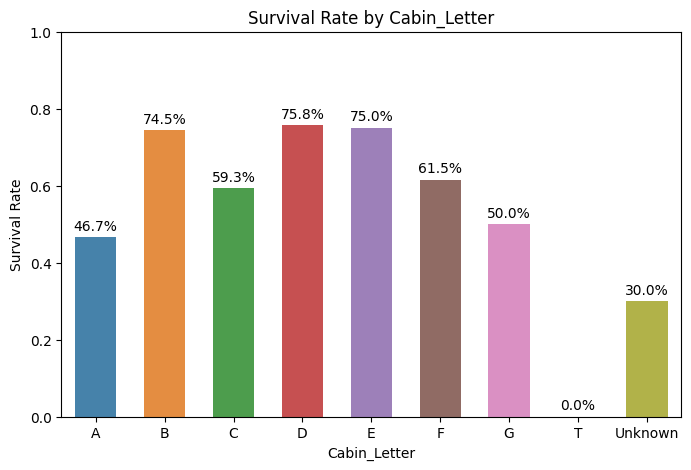

In [116]:
#create a bar plot showing the relationship between Cabin_Letter and survival rate:

fig = plt.figure(figsize=(8, 5))

Cabin_Letter_survival_rate = train.groupby('Cabin_Letter')['Survived'].mean().reset_index()
ax = sns.barplot(x='Cabin_Letter', y='Survived', data=Cabin_Letter_survival_rate, alpha=0.9, width=0.6)
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                textcoords='offset points')
plt.title('Survival Rate by Cabin_Letter')
plt.xlabel('Cabin_Letter')
plt.ylabel('Survival Rate')
plt.ylim([0, 1])

plt.show()


In [117]:
train['Is_Female']= train.Sex.apply(lambda x: 1 if x=='female' else 0)

In [118]:
train['Family_Size']= train['Parch'] + train['SibSp'] + 1

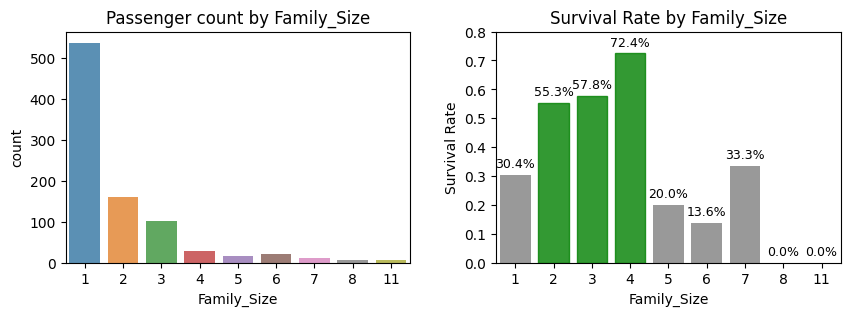

In [119]:
#Create a graph showing the number of passengers per Family_Size and survival rate per Family_Size.

fig = plt.figure(figsize=(10, 3))

ax1 = plt.subplot(1, 2, 1)
sns.countplot(x="Family_Size", data=train, alpha=0.8, ax=ax1)
ax1.set_title("Passenger count by Family_Size")

ax2 = plt.subplot(1, 2, 2)
Family_Size_survival_rate = train.groupby('Family_Size')['Survived'].mean().reset_index().sort_values(by='Survived', ascending=False)
sns.barplot(x='Family_Size', y='Survived', data=Family_Size_survival_rate, alpha=0.8, color='grey', ax=ax2)
for i in range(1, 4):
    plt.gca().get_children()[i].set_color('g')
ax2.set_title('Survival Rate by Family_Size')
ax2.set_xlabel('Family_Size')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 0.8])

for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.25)
plt.show()


In [120]:
#Group Family_Size values into four categories
train['Family_Size']=train['Family_Size'].map({1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'})

In [121]:
tickets= all_data.groupby(['Ticket'])[['PassengerId']].count().rename(columns={'PassengerId': 'Count'})
tickets.head()

,Count
Ticket,
110152,3
110413,3
110465,2
110469,1
110489,1


In [122]:
#Add the number of ticket occurrences for each passenger to the Group_Size column
train['Group_Size']=train['Ticket'].apply(lambda x: tickets.loc[x, 'Count'])

In [123]:
train['Title'] = train['Name'].str.split(', ').str[1].str.split('.').str[0]
all_data['Title'] = all_data['Name'].str.split(', ').str[1].str.split('.').str[0]
all_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [124]:
#For train['Title'], use the map method to replace the honorific title (Title) values based on the dictionary above.
#This will group the honorific titles (Title).

title_mapping= {'Mr':'Mr', 'Mrs':'Mrs', 'Miss':'Miss','Master':'Master', 'Don':'Rare', 'Rev':'Rare', 'Dr':'Rare', 'Mme':'Mrs', 'Ms':'Miss',
       'Major':'Rare', 'Lady':'Rare' , 'Sir':'Rare', 'Mlle':'Miss', 'Col':'Rare', 'Capt':'Rare', 'the Countess':'Rare',
       'Jonkheer':'Rare', 'Dona':'Rare'}
train['Title']= train['Title'].map(title_mapping)
train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

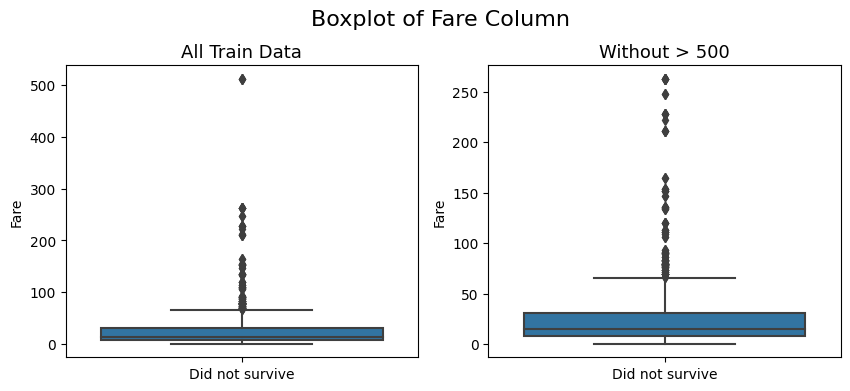

In [125]:
#The figure on the right shows a more detailed picture, removing outliers with fares greater than 500,
#while the figure on the left includes all training data and shows the distribution of fares and outliers.

fig = plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data=train, y="Fare", ax=ax1)
ax1.set_xticks([0], ['Did not survive'])
ax1.set_title("All Train Data", fontsize= 13)

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data=train[train['Fare']<500], y="Fare",  ax=ax2)
ax2.set_xticks([0], ['Did not survive'])
ax2.set_title("Without > 500", fontsize= 13)

plt.suptitle('Boxplot of Fare Column', fontsize= 16)
plt.subplots_adjust(top=0.84)

plt.show()

In [126]:
Q1, Q2, Q3 = np.percentile(train['Fare'], [25, 50, 75])
IQR = Q3 - Q1

fare_bin_edges = [-np.inf, Q1, Q2, Q3, 1.5 * IQR, np.inf]

fare_bin_labels = []
for i in range(len(fare_bin_edges)-1):
    fare_bin_labels.append("{}_to_{}".format(fare_bin_edges[i], fare_bin_edges[i+1]))

train['Fare_bin'] = pd.cut(train['Fare'], bins=fare_bin_edges, labels=fare_bin_labels)


In [127]:
print(Q1 - 1.5 * IQR)


-26.724


In [128]:
#Number of passengers for each Fare_bin

train[['Fare_bin']].value_counts()

Fare_bin         
7.9104_to_14.4542    224
-inf_to_7.9104       223
14.4542_to_31.0      222
34.6344_to_inf       200
31.0_to_34.6344       22
dtype: int64

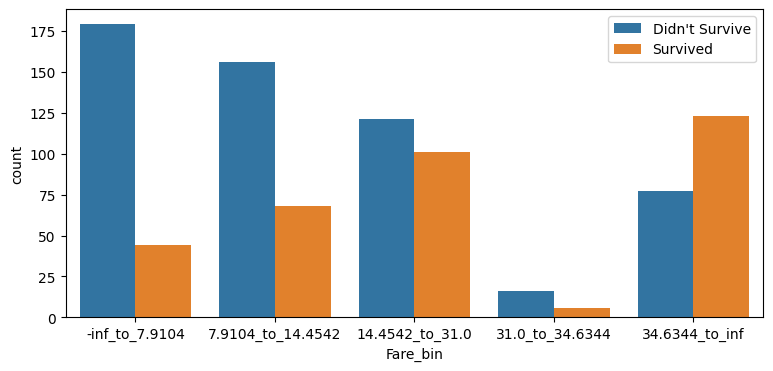

In [129]:
#Visualize survival rate for each Fare_bin
plt.figure(figsize=(9,4))
sns.countplot(x='Fare_bin', hue='Survived', data=train)
plt.legend(labels=["Didn't Survive","Survived"])
plt.show()

In [130]:
Q1 = train['Age'].quantile(0.25)
Q3 = train['Age'].quantile(0.75)
IQR = Q3 - Q1

num_bins = 10
age_bin_edges = np.linspace(start=0, stop=train.Age.max(), num=num_bins + 1).astype(int)

age_bin_labels=[]
for i in range(len(age_bin_edges)-1):
    age_bin_labels.append("{}_to_{}".format(age_bin_edges[i], age_bin_edges[i+1]))

train['Age_bin'] = pd.cut(train['Age'], bins=age_bin_edges, labels= age_bin_labels)

In [131]:
train['Age_bin'].value_counts()

24_to_32    274
16_to_24    219
32_to_40    148
40_to_48     70
0_to_8       54
8_to_16      46
48_to_56     45
56_to_64     24
64_to_72      9
72_to_80      2
Name: Age_bin, dtype: int64

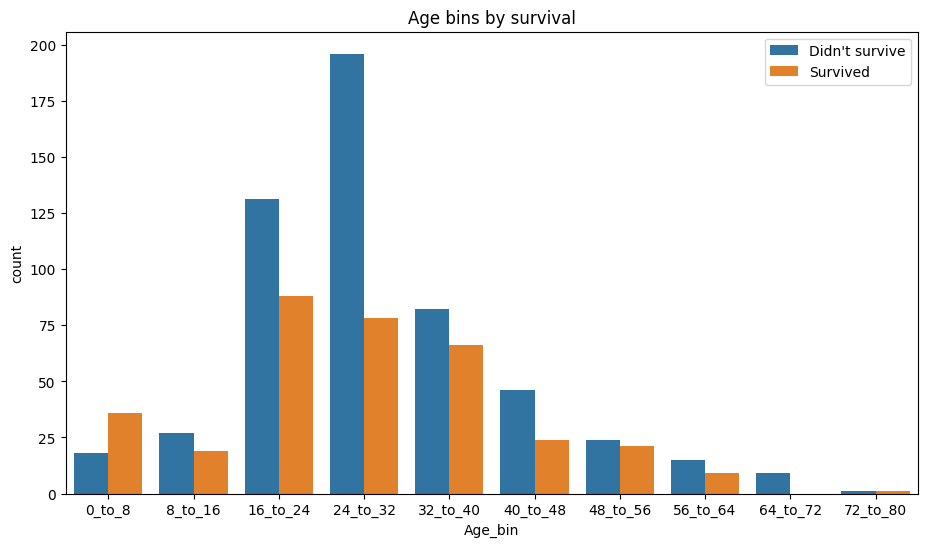

In [132]:
plt.figure(figsize=(11,6))
sns.countplot(x='Age_bin', hue='Survived', data=train)
plt.legend(["Didn't survive","Survived"])
plt.title('Age bins by survival')
plt.show()

In [133]:
train["Age_bin_Sex"] = train["Age_bin"].astype(str) + "_" + train["Sex"]
train["Age_bin_Pclass"] = train["Age_bin"].astype(str) + "_" + train["Pclass"].astype(str)

train["Fare_bin_Sex"] = train["Fare_bin"].astype(str) + "_" + train["Sex"]
train["Fare_bin_Pclass"] = train["Fare_bin"].astype(str) + "_" + train["Pclass"].astype(str)

train["Pclass_Sex"] = train["Pclass"].astype(str) + "_" + train["Sex"]
train["Pclass_Title"] = train["Pclass"].astype(str) + "_" + train["Title"]
train["Sex_Title"] = train["Sex"].astype(str) + "_" + train["Title"]

train["Age_bin_Title"] = train["Age_bin"].astype(str) + "_" + train["Title"]
train["Fare_bin_Title"] = train["Fare_bin"].astype(str) + "_" + train["Title"]

train['Fam_Size_Cabin']= train["Family_Size"].astype(str) + "_" + train["Cabin_Letter"].astype(str)
train['Fam_Size_Parch']= train["Family_Size"].astype(str) + "_" + train["Parch"].astype(str)
train['Fam_Size_Fare_bin']= train["Family_Size"].astype(str) + "_" + train["Fare_bin"].astype(str)

train['SibSp_Parch_Ratio'] = train.apply(lambda x: x['SibSp'] / train.loc[x.name, 'Parch'] if train.loc[x.name, 'Parch'] != 0 else 0, axis=1)
train['Age_bin_Fare_bin']= train["Age_bin"].astype(str) + "_" + train["Fare_bin"].astype(str)

In [134]:
#Check missing values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [135]:
test['Age'] = test.apply(lambda x: age_median.loc[(x['Pclass'], x['Sex'])] if np.isnan(x['Age']) else x['Age'], axis=1)

In [136]:
test[test.isnull()['Fare']== True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [137]:
avg_fare = test["Fare"].mean(axis=0)
test["Fare"].replace(np.nan, avg_fare, inplace=True)

In [138]:
#Cabin_Letter
test['Cabin_Letter'] = test['Cabin'].str[:1]
test.Cabin_Letter= test.Cabin_Letter.fillna('Unknown')

#Family_Size
test['Family_Size']= test['Parch'] + test['SibSp'] + 1
test['Family_Size']=test['Family_Size'].map({1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'})

#Is_Female
test['Is_Female']= test.Sex.apply(lambda x: 1 if x=='female' else 0)

#Group_Size
test['Group_Size']=test['Ticket'].apply(lambda x: tickets.loc[x, 'Count'])

#Title
test['Title'] = test['Name'].str.split(', ').str[1].str.split('.').str[0]
test['Title']= test['Title'].map(title_mapping)

#Fare_bin
test['Fare_bin'] = pd.cut(test['Fare'], bins=fare_bin_edges, labels=fare_bin_labels)

#Age_bins
test['Age_bin'] = pd.cut(test['Age'], bins=age_bin_edges, labels=age_bin_labels)

#SibSp_Parch Ratio
test['SibSp_Parch_Ratio'] = test.apply(lambda x: x['SibSp'] / test.loc[x.name, 'Parch'] if test.loc[x.name, 'Parch'] != 0 else 0, axis=1)

#Age_bin / Sex
test["Age_bin_Sex"] = test["Age_bin"].astype(str) + "_" + test["Sex"]

#Age_bin / Pcalss
test["Age_bin_Pclass"] = test["Age_bin"].astype(str) + "_" + test["Pclass"].astype(str)

#Fare_bin / Sex
test["Fare_bin_Sex"] = test["Fare_bin"].astype(str) + "_" + train["Sex"]

#Fare_bin / Pclass
test["Fare_bin_Pclass"] = test["Fare_bin"].astype(str) + "_" + test["Pclass"].astype(str)

#Pclass / Sex
test["Pclass_Sex"] = test["Pclass"].astype(str) + "_" + test["Sex"]

#Pclass / Title
test["Pclass_Title"] = test["Pclass"].astype(str) + "_" + test["Title"]

#Sex / Title
test["Sex_Title"] = test["Sex"].astype(str) + "_" + test["Title"]

#Age_bin / Title
test["Age_bin_Title"] = test["Age_bin"].astype(str) + "_" + test["Title"]

#Fare_bin / Title
test["Fare_bin_Title"] = test["Fare_bin"].astype(str) + "_" + test["Title"]

#Fam_Size / Cabin_Letter
test['Fam_Size_Cabin']= test["Family_Size"].astype(str) + "_" + test["Cabin_Letter"].astype(str)

#Fam_Size / Parch
test['Fam_Size_Parch']= test["Family_Size"].astype(str) + "_" + test["Parch"].astype(str)

#Fam_Size / Fare_bin
test['Fam_Size_Fare_bin']= test["Family_Size"].astype(str) + "_" + test["Fare_bin"].astype(str)


test.drop(columns=['Cabin'],inplace= True)

test['Age_bin_Fare_bin']= test["Age_bin"].astype(str) + "_" + test["Fare_bin"].astype(str)

In [139]:
cols_to_drop=['Sex','Name','Ticket']
for df in [train,test]:
    df.drop(columns=cols_to_drop, inplace= True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter,Is_Female,...,Pclass_Sex,Pclass_Title,Sex_Title,Age_bin_Title,Fare_bin_Title,Fam_Size_Cabin,Fam_Size_Parch,Fam_Size_Fare_bin,SibSp_Parch_Ratio,Age_bin_Fare_bin
0,1,0,3,22.0,1,0,7.2500,S,Unknown,0,...,3_male,3_Mr,male_Mr,16_to_24_Mr,-inf_to_7.9104_Mr,Small_Unknown,Small_0,Small_-inf_to_7.9104,0.0,16_to_24_-inf_to_7.9104
1,2,1,1,38.0,1,0,71.2833,C,C,1,...,1_female,1_Mrs,female_Mrs,32_to_40_Mrs,34.6344_to_inf_Mrs,Small_C,Small_0,Small_34.6344_to_inf,0.0,32_to_40_34.6344_to_inf
2,3,1,3,26.0,0,0,7.9250,S,Unknown,1,...,3_female,3_Miss,female_Miss,24_to_32_Miss,7.9104_to_14.4542_Miss,Alone_Unknown,Alone_0,Alone_7.9104_to_14.4542,0.0,24_to_32_7.9104_to_14.4542
3,4,1,1,35.0,1,0,53.1000,S,C,1,...,1_female,1_Mrs,female_Mrs,32_to_40_Mrs,34.6344_to_inf_Mrs,Small_C,Small_0,Small_34.6344_to_inf,0.0,32_to_40_34.6344_to_inf
4,5,0,3,35.0,0,0,8.0500,S,Unknown,0,...,3_male,3_Mr,male_Mr,32_to_40_Mr,7.9104_to_14.4542_Mr,Alone_Unknown,Alone_0,Alone_7.9104_to_14.4542,0.0,32_to_40_7.9104_to_14.4542


In [140]:
num_features = ["Age", "Fare"]
for col in num_features:
    scaler = StandardScaler()
    train[col] = scaler.fit_transform(np.array(train[col].values).reshape(-1, 1))

train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter,Is_Female,...,Pclass_Sex,Pclass_Title,Sex_Title,Age_bin_Title,Fare_bin_Title,Fam_Size_Cabin,Fam_Size_Parch,Fam_Size_Fare_bin,SibSp_Parch_Ratio,Age_bin_Fare_bin
0,1,0,3,-0.534891,1,0,-0.502445,S,Unknown,0,...,3_male,3_Mr,male_Mr,16_to_24_Mr,-inf_to_7.9104_Mr,Small_Unknown,Small_0,Small_-inf_to_7.9104,0.0,16_to_24_-inf_to_7.9104
1,2,1,1,0.668392,1,0,0.786845,C,C,1,...,1_female,1_Mrs,female_Mrs,32_to_40_Mrs,34.6344_to_inf_Mrs,Small_C,Small_0,Small_34.6344_to_inf,0.0,32_to_40_34.6344_to_inf
2,3,1,3,-0.234070,0,0,-0.488854,S,Unknown,1,...,3_female,3_Miss,female_Miss,24_to_32_Miss,7.9104_to_14.4542_Miss,Alone_Unknown,Alone_0,Alone_7.9104_to_14.4542,0.0,24_to_32_7.9104_to_14.4542
3,4,1,1,0.442776,1,0,0.420730,S,C,1,...,1_female,1_Mrs,female_Mrs,32_to_40_Mrs,34.6344_to_inf_Mrs,Small_C,Small_0,Small_34.6344_to_inf,0.0,32_to_40_34.6344_to_inf
4,5,0,3,0.442776,0,0,-0.486337,S,Unknown,0,...,3_male,3_Mr,male_Mr,32_to_40_Mr,7.9104_to_14.4542_Mr,Alone_Unknown,Alone_0,Alone_7.9104_to_14.4542,0.0,32_to_40_7.9104_to_14.4542


In [141]:
cat_variables= ['Embarked',
                'Fam_Size_Cabin',
                'Fam_Size_Parch',
                'Fam_Size_Fare_bin' ,
                'Cabin_Letter',
                'Title',
                'Family_Size',
                'Age_bin_Sex',
                'Age_bin_Pclass',
                'Fare_bin_Sex',
                'Fare_bin_Pclass',
                'Fare_bin_Title',
                'Pclass_Sex',
                'Pclass_Title',
                'Sex_Title',
                'Age_bin_Title',
                'Fare_bin',
                'Age_bin',
                'Age_bin_Fare_bin']

train = pd.get_dummies(data = train,
                       prefix = cat_variables,
                       columns = cat_variables)

test = pd.get_dummies(data = test,
                      prefix = cat_variables,
                      columns = cat_variables)
print(F"Number of columns in train= {train.shape[1]}")
print(F"Number of columns in test= {train.shape[1]}")

train.head()

Number of columns in train= 294
Number of columns in test= 294


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Is_Female,Group_Size,SibSp_Parch_Ratio,...,Age_bin_Fare_bin_64_to_72_14.4542_to_31.0,Age_bin_Fare_bin_64_to_72_34.6344_to_inf,Age_bin_Fare_bin_64_to_72_7.9104_to_14.4542,Age_bin_Fare_bin_72_to_80_-inf_to_7.9104,Age_bin_Fare_bin_72_to_80_14.4542_to_31.0,Age_bin_Fare_bin_8_to_16_-inf_to_7.9104,Age_bin_Fare_bin_8_to_16_14.4542_to_31.0,Age_bin_Fare_bin_8_to_16_31.0_to_34.6344,Age_bin_Fare_bin_8_to_16_34.6344_to_inf,Age_bin_Fare_bin_8_to_16_7.9104_to_14.4542
0,1,0,3,-0.534891,1,0,-0.502445,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0.668392,1,0,0.786845,1,2,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,-0.234070,0,0,-0.488854,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0.442776,1,0,0.420730,1,2,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,0.442776,0,0,-0.486337,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
train, test = train.align(test, axis=1, fill_value=0)
print(F"Number of columns in train= {train.shape[1]}")
print(F"Number of columns in test= {train.shape[1]}")


Number of columns in train= 300
Number of columns in test= 300


In [143]:
corr_with_survived= train.corr()[['Survived']]
selected_binary_features = [col for col in train.columns
                            if set(train[col].unique()) == {0, 1}
                                and (train[col].sum()/len(train) > 0.1 and  abs(corr_with_survived.loc[col].values[0])>= 0.15 )]



if 'Survived' in selected_binary_features:
    selected_binary_features.remove('Survived')
print(F"Number of selected binary features= {len(selected_binary_features)}")
selected_binary_features

Number of selected binary features= 38


['Age_bin_Fare_bin_24_to_32_-inf_to_7.9104',
 'Age_bin_Pclass_24_to_32_3',
 'Age_bin_Sex_16_to_24_female',
 'Age_bin_Sex_16_to_24_male',
 'Age_bin_Sex_24_to_32_male',
 'Age_bin_Title_16_to_24_Mr',
 'Age_bin_Title_24_to_32_Mr',
 'Cabin_Letter_Unknown',
 'Embarked_C',
 'Fam_Size_Cabin_Alone_Unknown',
 'Fam_Size_Fare_bin_Alone_-inf_to_7.9104',
 'Fam_Size_Fare_bin_Small_34.6344_to_inf',
 'Fam_Size_Parch_Alone_0',
 'Fam_Size_Parch_Small_1',
 'Family_Size_Alone',
 'Family_Size_Small',
 'Fare_bin_-inf_to_7.9104',
 'Fare_bin_34.6344_to_inf',
 'Fare_bin_Pclass_-inf_to_7.9104_3',
 'Fare_bin_Pclass_34.6344_to_inf_1',
 'Fare_bin_Sex_-inf_to_7.9104_male',
 'Fare_bin_Sex_14.4542_to_31.0_female',
 'Fare_bin_Sex_34.6344_to_inf_female',
 'Fare_bin_Sex_7.9104_to_14.4542_male',
 'Fare_bin_Title_-inf_to_7.9104_Mr',
 'Fare_bin_Title_7.9104_to_14.4542_Mr',
 'Is_Female',
 'Pclass_Sex_1_female',
 'Pclass_Sex_2_male',
 'Pclass_Sex_3_male',
 'Pclass_Title_2_Mr',
 'Pclass_Title_3_Mr',
 'Sex_Title_female_Miss',
 

In [144]:
non_binary_features= [col for col in train.columns if set(train[col].unique()) != {0, 1} and col != 'PassengerId']
print(F"Number of non binary features= {len(non_binary_features)}")
non_binary_features

Number of non binary features= 13


['Age',
 'Age_bin_Fare_bin_72_to_80_34.6344_to_inf',
 'Age_bin_Sex_72_to_80_female',
 'Age_bin_Title_72_to_80_Mrs',
 'Fam_Size_Fare_bin_Large_-inf_to_7.9104',
 'Fam_Size_Parch_Large_9',
 'Fare',
 'Fare_bin_Title_-inf_to_7.9104_Master',
 'Group_Size',
 'Parch',
 'Pclass',
 'SibSp',
 'SibSp_Parch_Ratio']

In [145]:
features=  non_binary_features + selected_binary_features
print(len(features))
features

51


['Age',
 'Age_bin_Fare_bin_72_to_80_34.6344_to_inf',
 'Age_bin_Sex_72_to_80_female',
 'Age_bin_Title_72_to_80_Mrs',
 'Fam_Size_Fare_bin_Large_-inf_to_7.9104',
 'Fam_Size_Parch_Large_9',
 'Fare',
 'Fare_bin_Title_-inf_to_7.9104_Master',
 'Group_Size',
 'Parch',
 'Pclass',
 'SibSp',
 'SibSp_Parch_Ratio',
 'Age_bin_Fare_bin_24_to_32_-inf_to_7.9104',
 'Age_bin_Pclass_24_to_32_3',
 'Age_bin_Sex_16_to_24_female',
 'Age_bin_Sex_16_to_24_male',
 'Age_bin_Sex_24_to_32_male',
 'Age_bin_Title_16_to_24_Mr',
 'Age_bin_Title_24_to_32_Mr',
 'Cabin_Letter_Unknown',
 'Embarked_C',
 'Fam_Size_Cabin_Alone_Unknown',
 'Fam_Size_Fare_bin_Alone_-inf_to_7.9104',
 'Fam_Size_Fare_bin_Small_34.6344_to_inf',
 'Fam_Size_Parch_Alone_0',
 'Fam_Size_Parch_Small_1',
 'Family_Size_Alone',
 'Family_Size_Small',
 'Fare_bin_-inf_to_7.9104',
 'Fare_bin_34.6344_to_inf',
 'Fare_bin_Pclass_-inf_to_7.9104_3',
 'Fare_bin_Pclass_34.6344_to_inf_1',
 'Fare_bin_Sex_-inf_to_7.9104_male',
 'Fare_bin_Sex_14.4542_to_31.0_female',
 'Far

In [146]:
# Set objective variables and features
y = train["Survived"]
X = train[features]

# Define the parameter grid
param_dist = {
'n_estimators': randint(50, 200),
'max_depth': randint(5, 20),
'min_samples_split': randint(2, 10),
'min_samples_leaf': randint(1, 10)
}

# Instantiate the random forest model
# random state is a seed value to control the result of random behavior or random number generation.
model = RandomForestClassifier(random_state=1)
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=5, random_state=1
)

random_search.fit(X, y)

# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 151}
Best Score: 0.8372669637813068


In [147]:
# Set objective variable and features
y_train = train["Survived"]
X_train = train[features]

y_test = test["Survived"]
X_test = test[features]

# Instantiate and train a random forest model with the best parameters
model = RandomForestClassifier(n_estimators=152, max_depth=14, min_samples_leaf= 3, min_samples_split= 6, random_state=1)
model.fit(X_train, y_train)

# Make predictions on test data
predictions = model.predict(X_test)

# Calculate accuracy scores
train_score = model.score(X_train, y_train)    # Accuracy on the training data
test_score = model.score(X_test, y_test)    # Accuracy on the test data

print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

Train Accuracy: 0.8799102132435466
Test Accuracy: 0.6363636363636364


In [148]:
# Check the importance of features in the random forest model
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                                     Feature  Importance
49                                  Title_Mr    0.122325
47                         Sex_Title_male_Mr    0.083561
6                                       Fare    0.082515
39                                 Is_Female    0.080490
0                                        Age    0.077890
8                                 Group_Size    0.048861
10                                    Pclass    0.046102
44                         Pclass_Title_3_Mr    0.046090
40                       Pclass_Sex_1_female    0.045307
42                         Pclass_Sex_3_male    0.024738
11                                     SibSp    0.024355
20                      Cabin_Letter_Unknown    0.021806
45                     Sex_Title_female_Miss    0.019551
12                         SibSp_Parch_Ratio    0.018441
46                      Sex_Title_female_Mrs    0.018310
50                                 Title_Mrs    0.016215
48                             

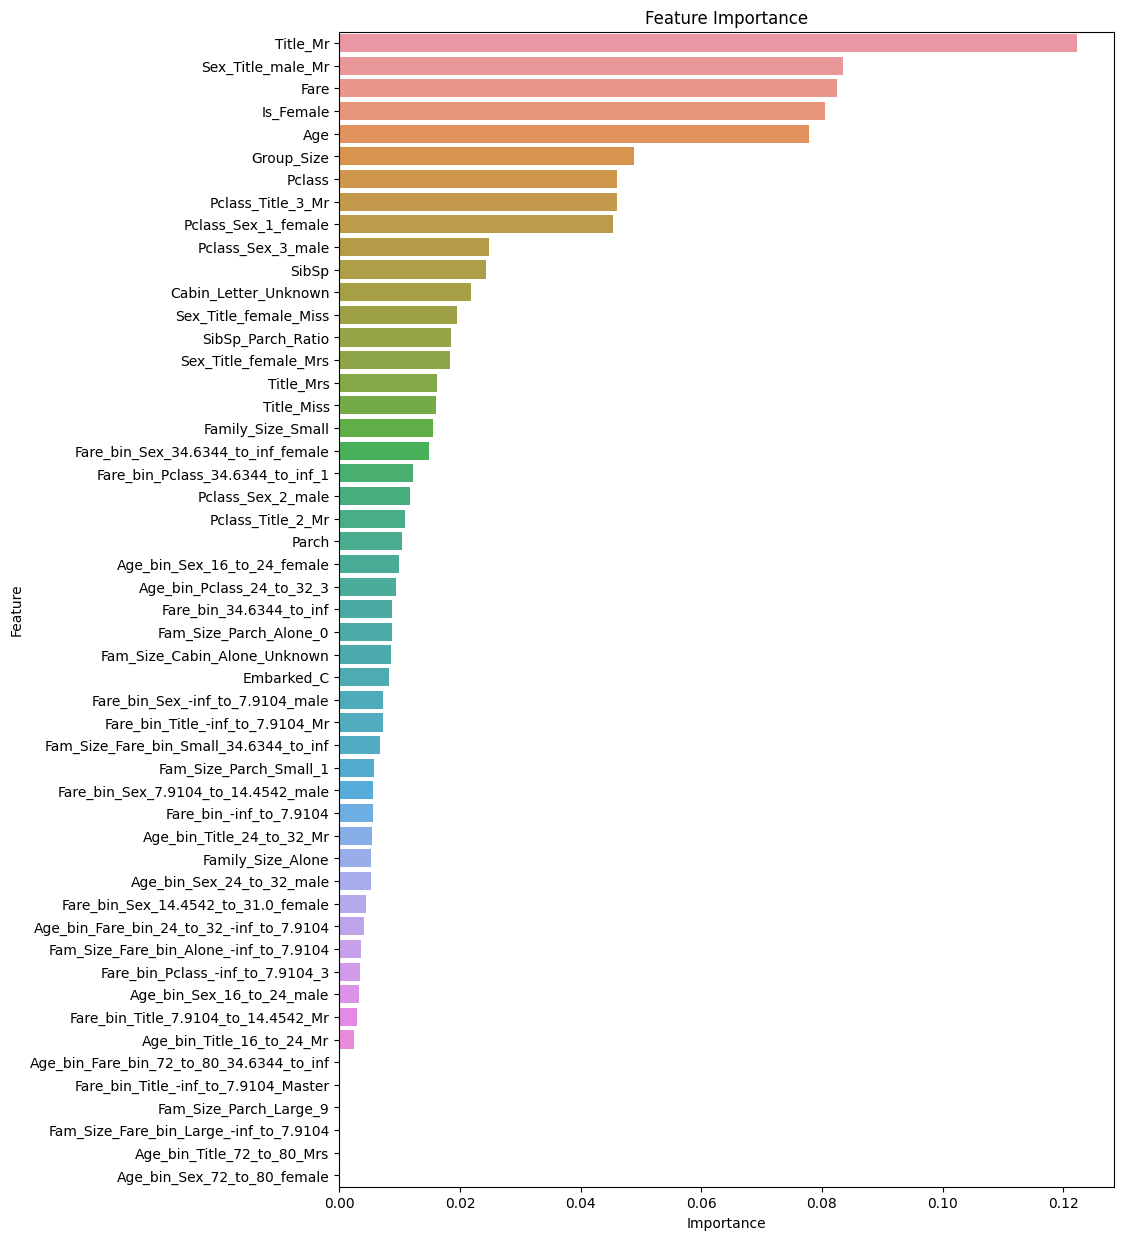

In [149]:
# Visualize
plt.figure(figsize=(10, int(len(feature_importance)/3.4)))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [150]:
threshold = 0.04
new_features = [feature for feature in features if feature_importance.loc[feature_importance['Feature'] == feature, 'Importance'].values[0] >= threshold]

In [151]:
# Set objective variables and features
y = train["Survived"]
X_train_selected = X_train[new_features]


# Define the parameter grid
param_dist = {
'n_estimators': randint(50, 200),
'max_depth': randint(5, 20),
'min_samples_split': randint(2, 10),
'min_samples_leaf': randint(1, 10)
}

# Instantiate the random forest model
# random state is a seed value to control the result of random behavior or random number generation.
model = RandomForestClassifier(random_state=1)
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=5, random_state=1
)

random_search.fit(X_train_selected, y)

# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 110}
Best Score: 0.8428661100998054


In [152]:

X_train_selected = X_train[new_features]
X_test_selected = X_test[new_features]

model = RandomForestClassifier(max_depth=11, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 110, random_state=1)
model.fit(X_train_selected, y_train)

# Calculate accuracy scores
train_score = model.score(X_train_selected, y_train)
test_score = model.score(X_test_selected, y_test)
print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

# Create a data frame for submission
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})

# Save the results as a CSV file
output.to_csv('submission.csv', index=False)

Train Accuracy: 0.9090909090909091
Test Accuracy: 0.7966507177033493
